In [8]:
import torch
from torch.utils.data import Dataset
import wfdb
import numpy as np
import os
import matplotlib.pyplot as plt

In [6]:

# Download the MIT-BIH Arrhythmia Database (if not already present)
if not os.path.exists("mitdb"):
    wfdb.dl_database('mitdb', dl_dir='../datasets/ECG')  # Downloads to current directory
    print("Dataset downloaded successfully!")
else:
    print("Dataset already exists")

Generating record list for: 100
Generating record list for: 101
Generating record list for: 102
Generating record list for: 103
Generating record list for: 104
Generating record list for: 105
Generating record list for: 106
Generating record list for: 107
Generating record list for: 108
Generating record list for: 109
Generating record list for: 111
Generating record list for: 112
Generating record list for: 113
Generating record list for: 114
Generating record list for: 115
Generating record list for: 116
Generating record list for: 117
Generating record list for: 118
Generating record list for: 119
Generating record list for: 121
Generating record list for: 122
Generating record list for: 123
Generating record list for: 124
Generating record list for: 200
Generating record list for: 201
Generating record list for: 202
Generating record list for: 203
Generating record list for: 205
Generating record list for: 207
Generating record list for: 208
Generating record list for: 209
Generati

In [4]:
class ECGDataset(Dataset):
    def __init__(self, record_ids, db_dir='mitdb'):
        self.record_ids = record_ids
        self.db_dir = db_dir
        self.annotations = []
        
        # Preload all records
        self.signals = []
        for rid in record_ids:
            # Load signals (2 leads)
            signals, _ = wfdb.rdsamp(rid) # pn_dir=self.db_dir
            self.signals.append(signals)
            
            # Load annotations
            ann = wfdb.rdann(rid, 'atr') # pn_dir=self.db_dir
            self.annotations.append(ann)
    
    def __len__(self):
        return len(self.record_ids)
    
    def __getitem__(self, idx):
        # Get signals and convert to tensor
        signals = torch.tensor(self.signals[idx]).float()
        
        # Create label tensor (1 for anomaly, 0 for normal)
        ann = self.annotations[idx]
        labels = np.zeros(len(self.signals[idx]))
        labels[ann.sample] = 1  # Mark anomaly locations
        
        return signals, torch.tensor(labels).float()

In [6]:
# Usage example
dataset = ECGDataset(['../datasets/ECG/100', '../datasets/ECG/101', '../datasets/ECG/102'])
print(f"Loaded {len(dataset)} records")

Loaded 3 records


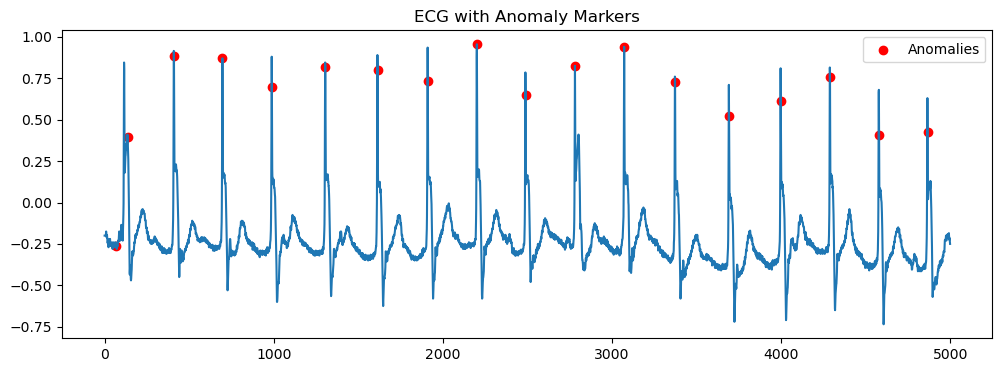

In [15]:
# Get first sample
signals, labels = dataset[2]  # Record 100

# Plot Lead 1
plt.figure(figsize=(12, 4))
plt.plot(signals[:5000, 0])  # First 1000 samples of Lead 1

# Mark anomalies
anomaly_samples = torch.where(labels[:5000] == 1)[0]
plt.scatter(anomaly_samples, signals[anomaly_samples, 0], 
            c='red', label='Anomalies')
plt.legend()
plt.title("ECG with Anomaly Markers")
plt.show()